Introduction to Modeling with Python
Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file.

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!

Grading
This homework is due Feb. 20, 2018 by 3:00pm Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

Code Quality - 10%
Storytelling - 10%
Result on Kaggle - 5%
Describing, Cleaning, and Visualizing data - 25%
Modeling - 50%
More specifically, for modeling we will look for:

Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?
Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

# Data Cleaning 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import statsmodels.formula.api as smf

In [2]:
#load the training and test data
train_data = pd.read_csv("C:/Users/zachp/Dropbox/AAEcon/213r/train.csv")
test_data = pd.read_csv("C:/Users/zachp/Dropbox/AAEcon/213r/test.csv")

# Missing Values

If there are values missing in the data the model will not run

In [3]:
#drop columns with more than 50% of data missing
train_data.dropna(thresh=int(len(train_data)*.5), axis=1, inplace =True)
#do the same for test data
test_data.dropna(thresh=int(len(train_data)*.5),axis =1, inplace = True)

# Skewness

Variables are skewed when a large fraction of the observations are the same. I will use 60% as a threshhold so if for a single variable more than 60% of the observations are the same I will drop the variable.

In [4]:
# A lot of the variables are skewed so we need to correct for skewness
# make a new array of variables where more than 60% of the observations are the same

dropped = []
for i in train_data:
    if train_data[i].dtype =='object':
        if train_data[i].value_counts(normalize = True).iloc[0]>.6:
            print(train_data[i].value_counts(normalize= True))
            dropped.append(i)
            

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64
Norm      0.989726
Feedr     0.004110
PosN      0.001370
RRNn      0.001370
Artery    0.001370
PosA      0.000685
RRAn      0.000

In [5]:
#drop all of the 'dropped array' columns
train_data.drop(dropped, axis = 1, inplace = True)
test_data.drop(dropped, axis =1, inplace =True)

In [6]:
train_data.shape


(1460, 50)

In [7]:
test_data.shape

(1459, 48)

In [8]:
#now we need to fill the remaining missing values with the mean for that column
train_df = train_data.fillna(train_data.mean()).round()

test_df = test_data.fillna(test_data.mean()).round()

In [9]:
#Now we will make a correlation heat map to see which of the 50 training observation are most correlated with house prices
corrmat = train_df.corr()

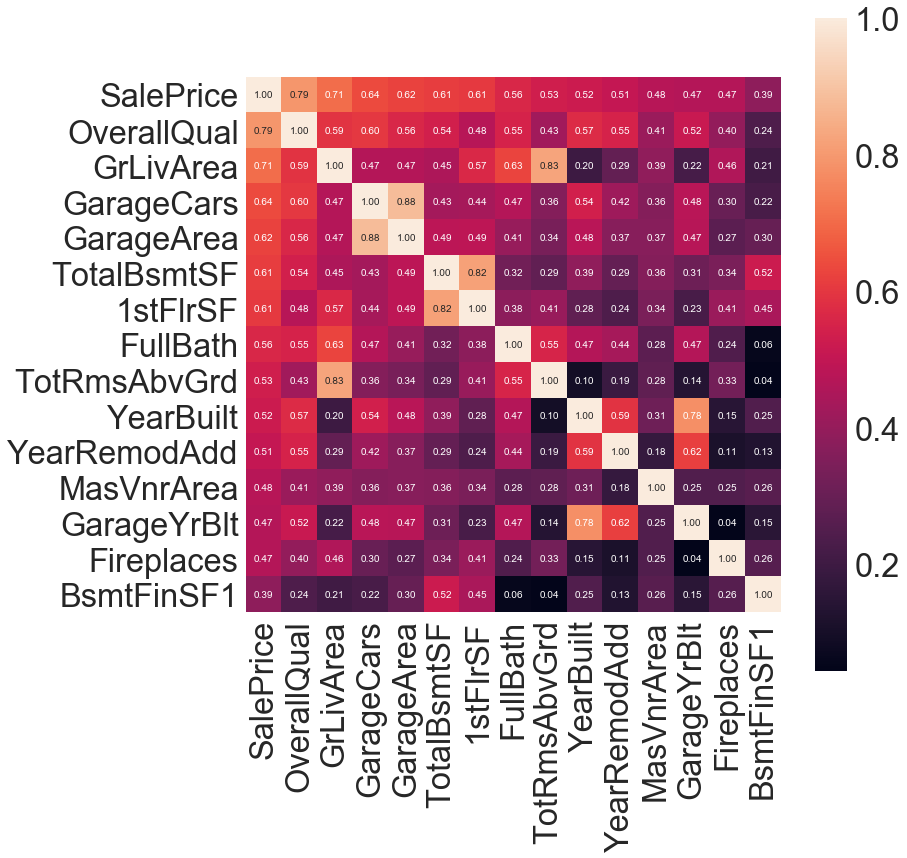

In [10]:
k =15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=3.25)
f, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# The Variables most correlated with SalePrice are:

Overall Quality 
GrLivArea
Garage Cars
Garage Area
TotalBsmtSF
1stFLrSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd
GarageYrBlt - 
MasVnrArea
FirePlaces
BsmtFinSF1 (type 1 finished square feet)

 - We probably on need garage area and not both garage area and cars and we probably just need year built and not both garage year built and year buit



In [11]:

cols.drop(['GarageCars','GarageYrBlt'])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1'],
      dtype='object')

In [12]:
#Now I will make a new array with just the variables I will use to predict housing prices

df_train = train_df[['SalePrice','OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']]
#the test data doesn't have SalePrice
df_test = test_df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']]

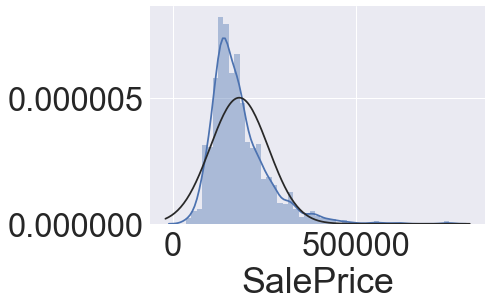

In [13]:
#look at the distribution of saleprice
sns.distplot(train_data['SalePrice'], fit=norm)

#fig = plt.figure()
#res = stats.probplot(train_data['SalePrice'], plot=plt)
#plt.show()


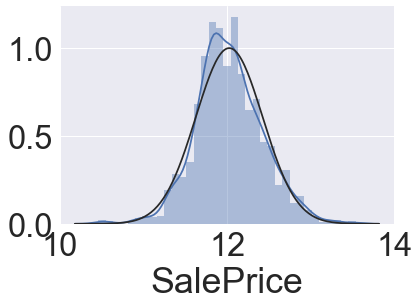

In [14]:
#since the data is skewed right we can try to normalize it by using log(saleprice)

train_df['SalePrice'] = np.log(train_df['SalePrice'])
sns.distplot(train_df['SalePrice'], fit = norm)

# Outliers
Another step in cleaning the data is to look for potential outliers

In [19]:
outlier_check = train_df.select_dtypes(exclude = ['object'])

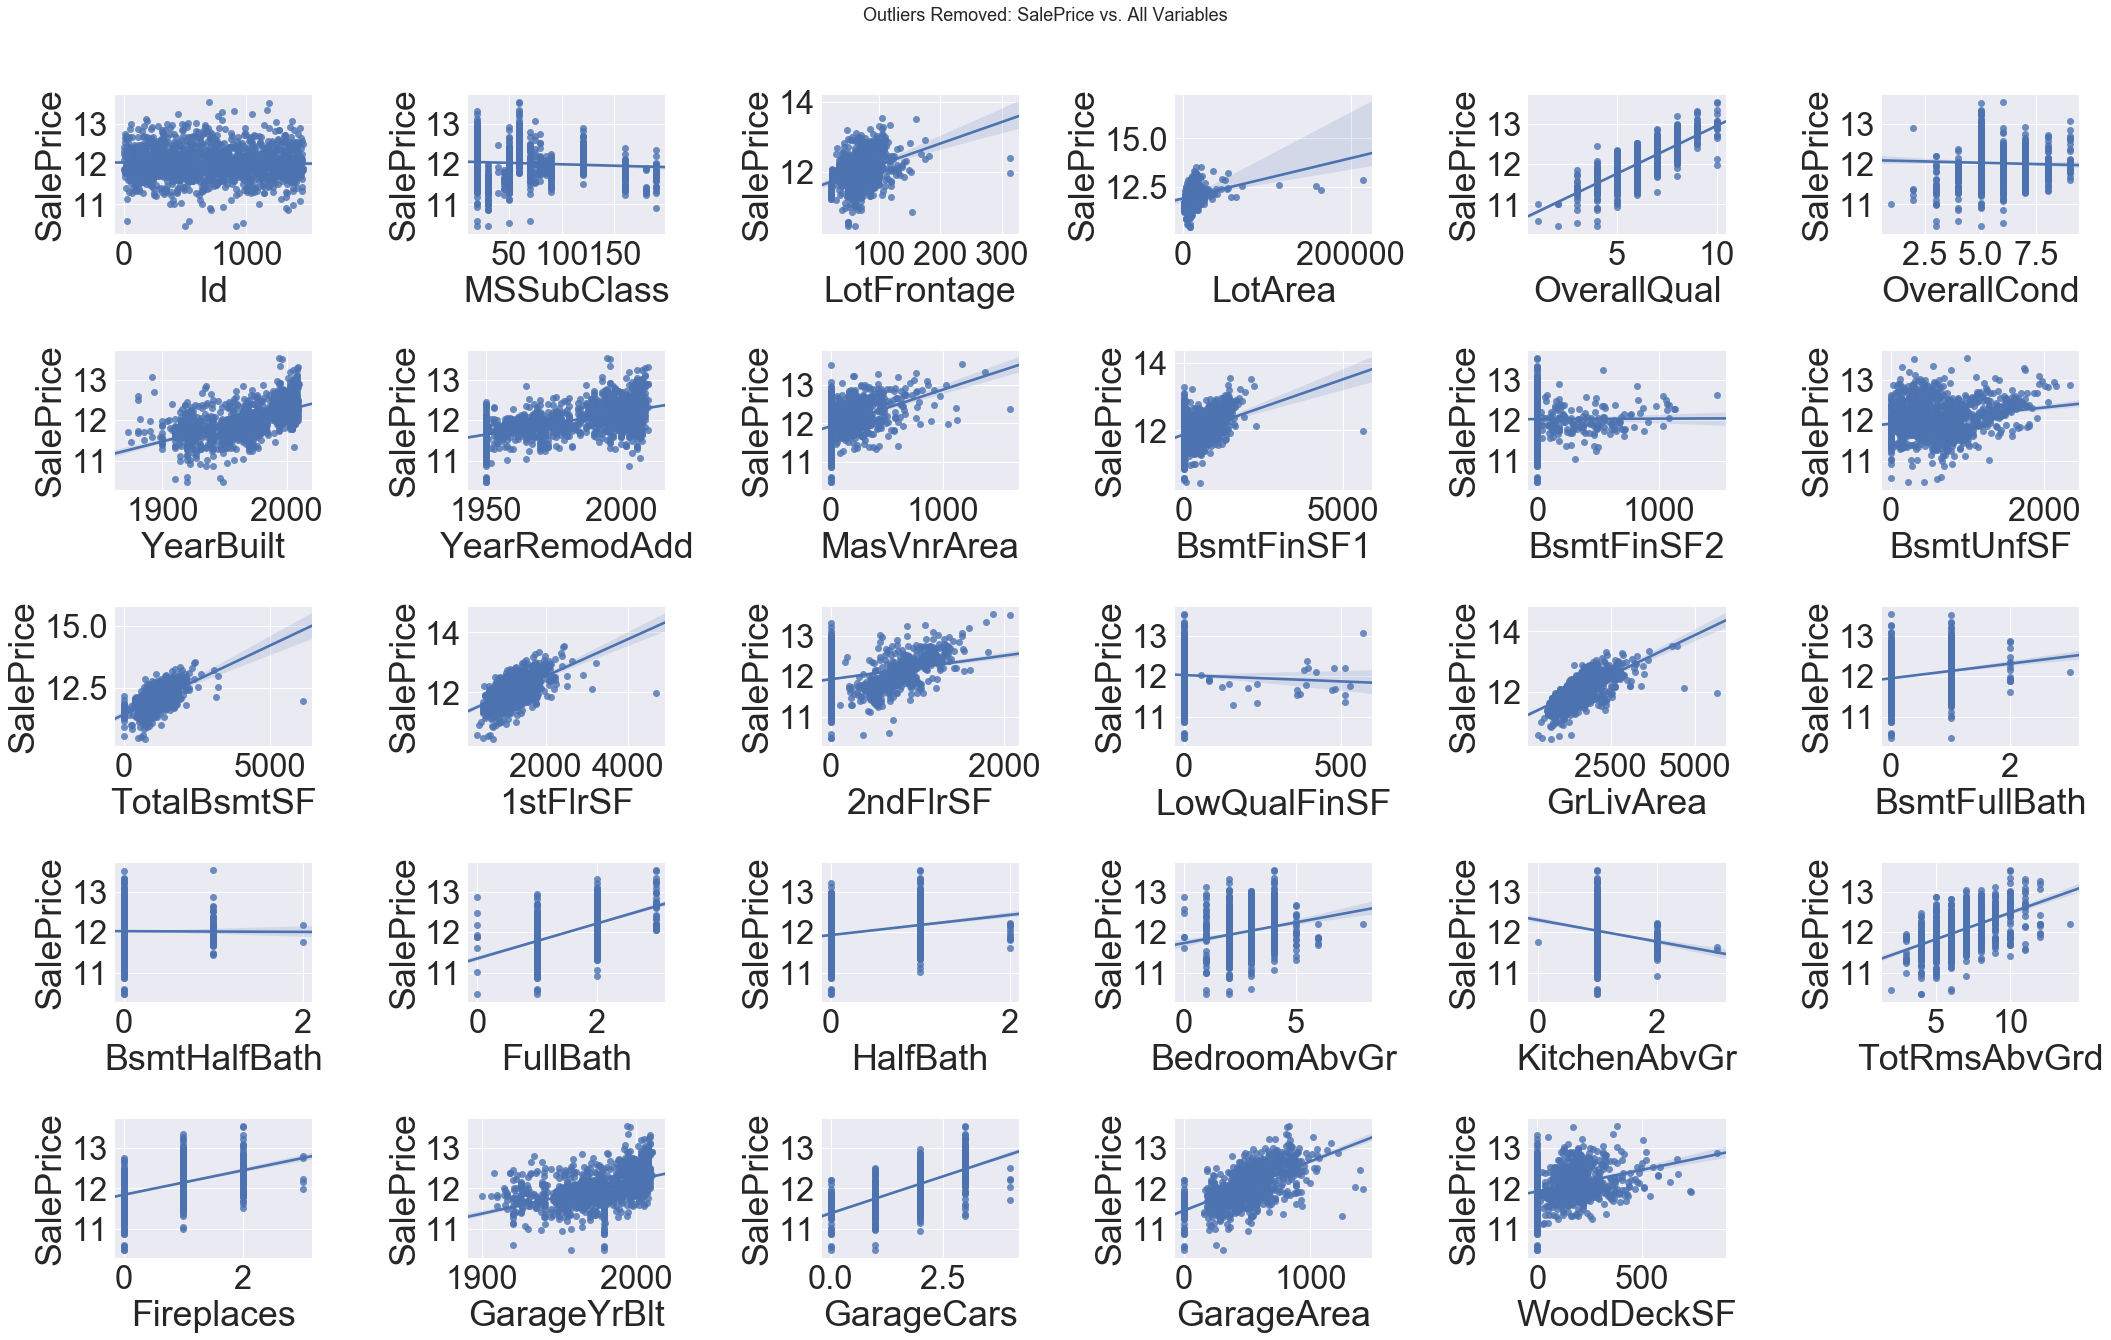

In [20]:
fig = plt.figure(figsize=(30,20))
#Create a regplot for each variable with SalePrice
for i in np.arange(29):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=outlier_check.iloc[:,i], y=train_df['SalePrice'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Outliers Removed: SalePrice vs. All Variables", fontsize = 18)
plt.show()

In [21]:
#Using regplots eyeball the variables that need to be modified
train_df = train_df.drop(train_df[(train_df['LotFrontage']>300)].index)
train_df = train_df.drop(train_df[(train_df['BsmtFinSF1']>5000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>500)].index)
train_df = train_df.drop(train_df[(train_df['1stFlrSF']>4000)].index)
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000)
                                  & (train_df['SalePrice']<12.5)].index)
train_df = train_df.drop(train_df[(train_df['OpenPorchSF']>500)
                                  & (train_df['SalePrice']<11)].index)
#do the same with test data
test_df = test_df.drop(test_df[(test_df['LotFrontage']>300)].index)
test_df = test_df.drop(test_df[(test_df['BsmtFinSF1']>5000)].index)
test_df = test_df.drop(test_df[(test_df['TotalBsmtSF']>500)].index)
test_df = test_df.drop(test_df[(test_df['1stFlrSF']>4000)].index)
test_df = test_df.drop(test_df[(test_df['GrLivArea']>4000)].index)                             
test_df  = test_df.drop(test_df[(test_df['OpenPorchSF']>500)].index)
                                  

Now I will get dummy variables to account for all the catergorical variables

In [22]:
df_train2 = pd.get_dummies(train_df)
df_test2 = pd.get_dummies(test_df)



In [23]:
target =(df_train['SalePrice'])
predictors = df_train.drop(['SalePrice'], axis=1)

## Modeling
Now that the data is cleaned, I am ready to start training and testing models on it. I will start by spliting my data into a training and test set and then I will scale the data. 

The models I will use are:
- Standard Gradient Descent
- K-Nearest Neighbor
- Elastic Net
- Descision Tree Regressor

In [24]:
#divide training data into train and test set for cross validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state = 42)

In order for a Machine Learning Algorithm to work the data needs to be scaled. This is typically done by transforming the data so that it has a mean of 0 and standard deviation of 1. I will use the StandardScaler from sklearn to scale my data

In [28]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(predictors)
scaled_data = scaler.transform(predictors)
scaled_test = scaler.transform(df_test)



# Standard Gradient Descent


In [29]:
#import the necessary moduals for the linear model
from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  GridSearchCV

In [32]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.0001,
       verbose=0, warm_start=False)

In [33]:
train_predictions = linear_regression_model.predict(x_train)
test_predictions = linear_regression_model.predict(x_test)
print(train_predictions)
print(test_predictions)

[  2.42359644e+15   3.58554359e+15   5.95579900e+15 ...,   2.94517753e+15
   4.81844460e+15   2.48489195e+15]
[  3.12028489e+15   6.71237911e+15   2.76754498e+15   5.40965252e+15
   2.66416554e+15   3.26314825e+15   5.98328011e+15   5.31094798e+15
   3.25110049e+15   4.92373334e+15   5.15719408e+15   3.16935342e+15
   2.62103272e+15   2.28794816e+15   5.69704939e+15   3.14330618e+15
   6.27776856e+15   3.12827187e+15   2.76098962e+15   2.77497570e+15
   3.02065947e+15   6.00212320e+15   5.88280129e+15   3.00495737e+15
   2.72493915e+15   2.80759223e+15   2.64223760e+15   2.93338173e+15
   5.43827102e+15   2.60413404e+15   4.47588969e+15   6.71565260e+15
   7.97452185e+15   2.95489299e+15   2.10809230e+15   3.09983159e+15
   5.60756500e+15   7.02460786e+15   7.32193546e+15   3.97183358e+15
   4.21097515e+15   6.64318533e+15   3.06542906e+15   1.52653883e+15
   3.06378652e+15   6.68840107e+15   3.03473843e+15   3.17856473e+15
   4.49608917e+15   5.34697565e+15   3.18838481e+15   3.012621

In [34]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Train RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

Train RMSE: 4583148819957359.0
Test RMSE: 4470337662642505.5


# K-Nearest Neighbor

K Nearest Neighbor regression allows you to cluster your data. Within a cluster the #k nearest neighbors will affectually take a vote to decide what observation will represent that cluster. Once the optimal number of neighbors is found and the cluster 'take their vote' a regression can be run

In [35]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

In [36]:
reg = KNeighborsRegressor()
gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
gridsearch.fit(x_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
y_pred_train = gridsearch.predict(x_train)
y_pred_test = gridsearch.predict(x_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Train MSE: 56646.332681017615	Test MSE: 1286755422.6540823


# Elastic Net

In [37]:
#Elastic Net will exhaustively search and find the best parameters of L1 and alpha
from sklearn.linear_model import ElasticNetCV
clf = ElasticNetCV(l1_ratio=[.01,.005,.01,.1,.9,1,10],alphas = [.0001,.01,.1,10,100 ,1000], max_iter = 5000)
clf.fit(x_train, y_train)
print("Best Alpha: {}".format(clf.alpha_))
print("Best L1/L2 Ratio: {}".format(clf.l1_ratio_))
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Best Alpha: 1000.0
Best L1/L2 Ratio: 1.0
Train MSE: 1397908469.73746
Test MSE: 1263845374.077762


C:\Users\zachp\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\zachp\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1032: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)


Notice that the Mean Squared Error is much smaller than those of Gradient Descent. While they are very small, there doesn't seem to be overfitting because the both MSE's for the train and test sets are similiar. 

In [38]:
clf.predict(scaled_test)[0:5]

array([-1345659.09391149, -1331618.80261003, -1332114.96693642,
       -1317980.27570741, -1304600.18120626])

# Final Test predictions

The K nearest neighbors regressor gave us the lowest mean squared error so we we will sumbmit those results to kaggle

# export to excel for kaggle submission


In [45]:
predictions = gridsearch.predict(df_test)
print(predictions)
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = [['SalePrice']]

[ 119370.7610536   178694.58431577  199907.30816034 ...,  169610.26080949
  101952.08250978  247805.4049559 ]


In [47]:
writer = pd.ExcelWriter('kaggle_data.xlsx', engine='xlsxwriter')
predictions_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

I submitted my predictions to Kaggle and got a score of 0.19854 and ranked 3415